<h1 style="text-align:center">TEAM SQUEEM</h1>
<img align="center" src="../squeemos_blk.png" width=200 height=200 />

In [1]:
# Aeon Williams
# 12/3/2020

from bae0n_utils import *
FitCellsToWindow()

import numpy as np
import pandas as pd
import matplotlib as mpl
from matplotlib import pyplot as plt
from matplotlib.pyplot import figure
import datetime
from PIL import Image, ImageDraw
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from statistics import mean 
import os
import shutil
import glob
from mpl_toolkits.basemap import Basemap
%matplotlib inline
plt.ioff()

from squeemtools.math import FCM


Bad key "text.kerning_factor" on line 4 in
C:\Users\aleja\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
http://github.com/matplotlib/matplotlib/blob/master/matplotlibrc.template
or from the matplotlib source distribution


# Comparing Kmeans & FCM

In [2]:
max_iter = 1000
tol = 10e-7

## Helper Functions

In [3]:
# Evaluate how similar two lists are
def similarity_metric(ls1, ls2):
    matching_value_count = 0
    for i in range(len(ls1)):
        if ls1[i] == ls2[i]:
            matching_value_count += 1
    return matching_value_count / float(len(ls1)) * 100

## Data Loading

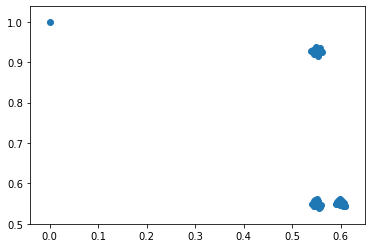

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X       101 non-null    float64
 1   Y       101 non-null    float64
dtypes: float64(2)
memory usage: 1.7 KB


None

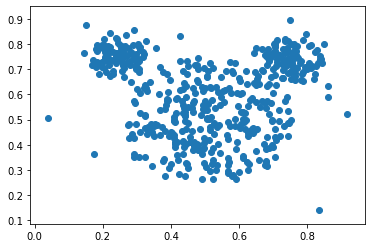

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X       500 non-null    float64
 1   Y       500 non-null    float64
 2   Loc     500 non-null    object 
dtypes: float64(2), object(1)
memory usage: 11.8+ KB


None

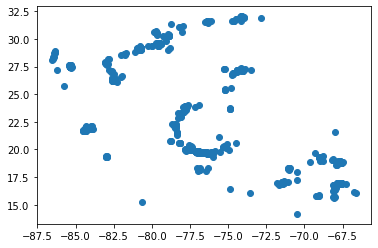

<class 'pandas.core.frame.DataFrame'>
Int64Index: 691 entries, 122796 to 123486
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X       691 non-null    float64
 1   Y       691 non-null    float64
dtypes: float64(2)
memory usage: 16.2 KB


None

In [4]:
mouse = pd.read_csv('./sample02.csv', sep=' ', names=['X', 'Y', 'Loc'])
blobs = pd.read_csv('./sample01.csv', usecols=[1,2], names=['X', 'Y'])

year, month, day, hour, minute = 2017,9,8,20,30
mi = 30
ln = pd.read_csv('./ATL_17_11_Irma_WWLLN_Locations.txt',header=None,names=     
                 ["Year","Month","Day","Hour","Min","Sec","Lat",
                  "Long","Dist_East_West","Dist_North_South"],
                 low_memory=False,sep=' ')
ln['Distance'] = np.sqrt(ln['Dist_East_West'] ** 2 + 
                         ln['Dist_North_South'] ** 2)
current_ln = ln[(ln['Month'] == month) & (ln['Day'] == day) & 
                (ln['Hour'] == hour) & (ln['Min'] >= minute) & 
                (ln['Min'] < minute + mi)].copy()
current_ln = current_ln.rename(columns={'Lat':'Y', 'Long':'X'})
current_ln = current_ln[['X','Y']]

dfs = {'blobs':blobs, 'mouse':mouse, 'ln':current_ln}

for name, df in dfs.items():
    figsize=(5,5)
    plt.scatter(df['X'], df['Y'])
    plt.show()
    display(df.info())

[0]
Raw Comparisons: 




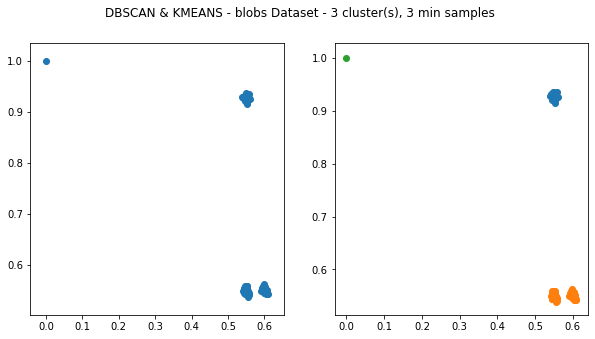

,X,Y,DBSCAN,KMEANS
0,0.000000,1.000000,0,2
1,0.605470,0.547282,0,1
2,0.590862,0.549582,0,1
3,0.548940,0.551625,0,1
4,0.603320,0.550609,0,1
...,...,...,...,...
96,0.598390,0.562372,0,1
97,0.554804,0.545750,0,1
98,0.593299,0.552969,0,1
99,0.544953,0.544810,0,1


[0]
Raw Comparisons: 




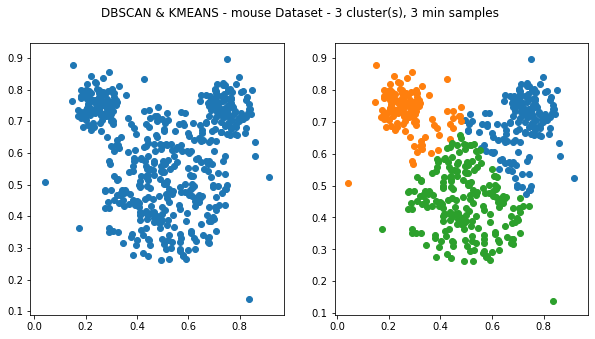

,X,Y,DBSCAN,KMEANS
0,0.456601,0.432806,0,2
1,0.611378,0.528625,0,2
2,0.450299,0.711606,0,1
3,0.639015,0.460744,0,2
4,0.628957,0.323470,0,2
...,...,...,...,...
495,0.151506,0.876586,0,1
496,0.860308,0.633833,0,0
497,0.862083,0.591805,0,0
498,0.916030,0.523391,0,0


[-1  0  1  2  3  4  5  6  7  8]
Raw Comparisons: 




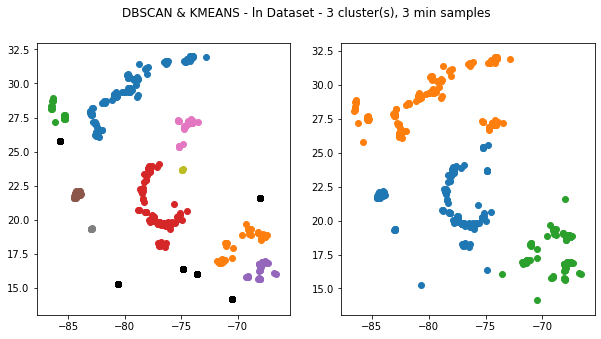

,X,Y,DBSCAN,KMEANS
122796,-79.5609,29.5326,0,1
122797,-71.0343,18.1271,1,2
122798,-85.4239,27.5546,2,1
122799,-85.3559,27.5989,2,1
122800,-76.2114,19.6181,3,0
...,...,...,...,...
123482,-78.1610,20.5861,3,0
123483,-84.5211,21.7879,5,0
123484,-84.3567,21.7220,5,0
123485,-79.8456,30.6004,0,1


[0]
Raw Comparisons: 




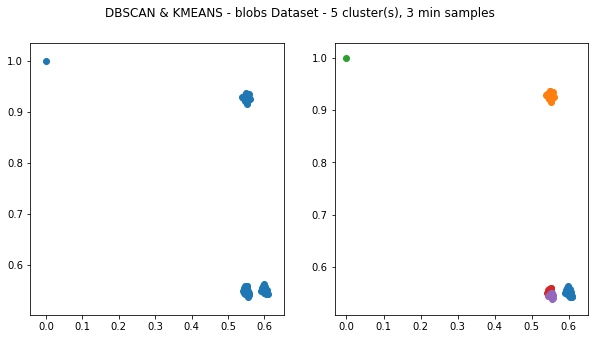

,X,Y,DBSCAN,KMEANS
0,0.000000,1.000000,0,2
1,0.605470,0.547282,0,0
2,0.590862,0.549582,0,0
3,0.548940,0.551625,0,3
4,0.603320,0.550609,0,0
...,...,...,...,...
96,0.598390,0.562372,0,0
97,0.554804,0.545750,0,4
98,0.593299,0.552969,0,0
99,0.544953,0.544810,0,4


[0]
Raw Comparisons: 




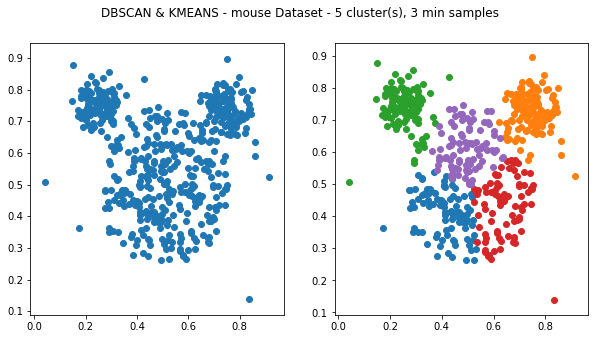

,X,Y,DBSCAN,KMEANS
0,0.456601,0.432806,0,0
1,0.611378,0.528625,0,3
2,0.450299,0.711606,0,4
3,0.639015,0.460744,0,3
4,0.628957,0.323470,0,3
...,...,...,...,...
495,0.151506,0.876586,0,2
496,0.860308,0.633833,0,1
497,0.862083,0.591805,0,1
498,0.916030,0.523391,0,1


[-1  0  1  2  3  4  5  6  7  8]
Raw Comparisons: 




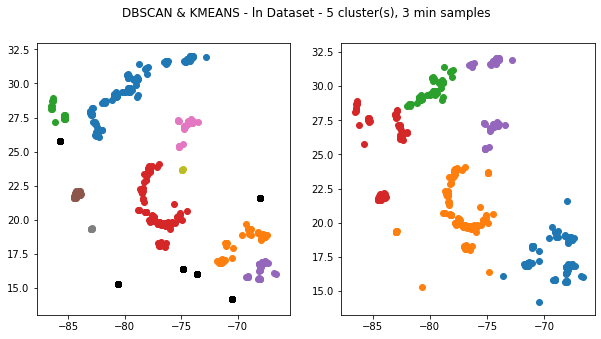

,X,Y,DBSCAN,KMEANS
122796,-79.5609,29.5326,0,2
122797,-71.0343,18.1271,1,0
122798,-85.4239,27.5546,2,3
122799,-85.3559,27.5989,2,3
122800,-76.2114,19.6181,3,1
...,...,...,...,...
123482,-78.1610,20.5861,3,1
123483,-84.5211,21.7879,5,3
123484,-84.3567,21.7220,5,3
123485,-79.8456,30.6004,0,2


[0]
Raw Comparisons: 




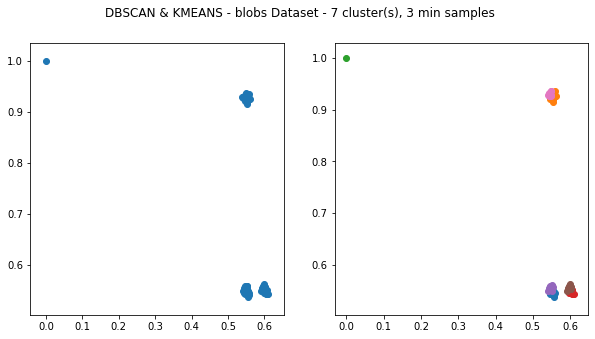

,X,Y,DBSCAN,KMEANS
0,0.000000,1.000000,0,2
1,0.605470,0.547282,0,3
2,0.590862,0.549582,0,5
3,0.548940,0.551625,0,4
4,0.603320,0.550609,0,3
...,...,...,...,...
96,0.598390,0.562372,0,5
97,0.554804,0.545750,0,0
98,0.593299,0.552969,0,5
99,0.544953,0.544810,0,0


[0]
Raw Comparisons: 




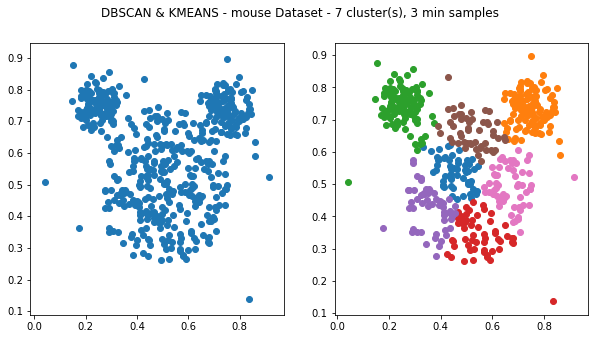

,X,Y,DBSCAN,KMEANS
0,0.456601,0.432806,0,4
1,0.611378,0.528625,0,6
2,0.450299,0.711606,0,5
3,0.639015,0.460744,0,6
4,0.628957,0.323470,0,3
...,...,...,...,...
495,0.151506,0.876586,0,2
496,0.860308,0.633833,0,1
497,0.862083,0.591805,0,1
498,0.916030,0.523391,0,6


[-1  0  1  2  3  4  5  6  7  8]
Raw Comparisons: 




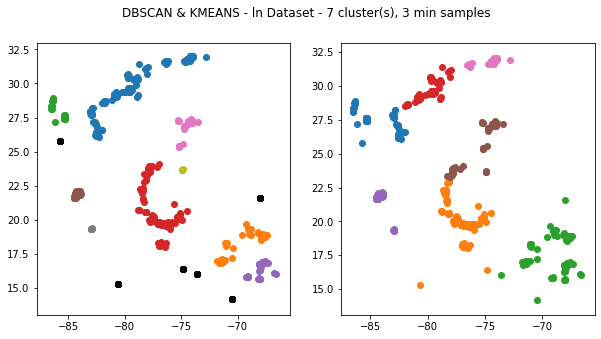

,X,Y,DBSCAN,KMEANS
122796,-79.5609,29.5326,0,3
122797,-71.0343,18.1271,1,2
122798,-85.4239,27.5546,2,0
122799,-85.3559,27.5989,2,0
122800,-76.2114,19.6181,3,1
...,...,...,...,...
123482,-78.1610,20.5861,3,1
123483,-84.5211,21.7879,5,4
123484,-84.3567,21.7220,5,4
123485,-79.8456,30.6004,0,3


[0]
Raw Comparisons: 




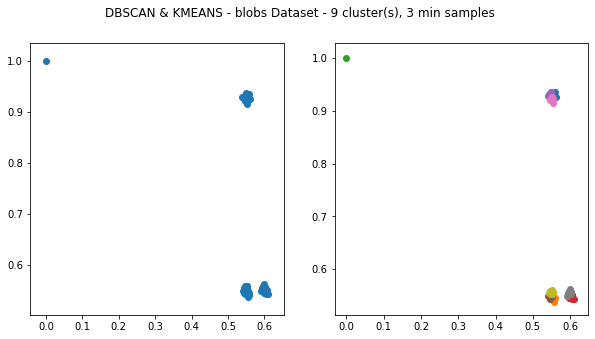

,X,Y,DBSCAN,KMEANS
0,0.000000,1.000000,0,2
1,0.605470,0.547282,0,3
2,0.590862,0.549582,0,7
3,0.548940,0.551625,0,5
4,0.603320,0.550609,0,3
...,...,...,...,...
96,0.598390,0.562372,0,7
97,0.554804,0.545750,0,1
98,0.593299,0.552969,0,7
99,0.544953,0.544810,0,5


[0]
Raw Comparisons: 




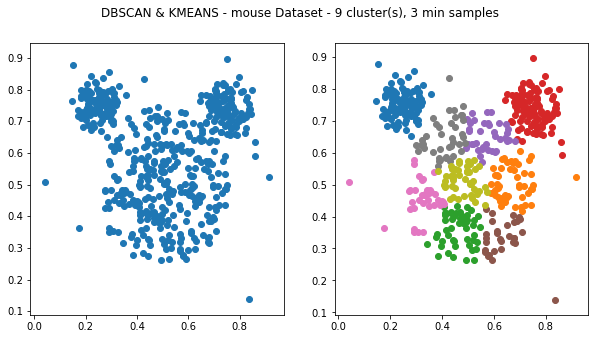

,X,Y,DBSCAN,KMEANS
0,0.456601,0.432806,0,2
1,0.611378,0.528625,0,1
2,0.450299,0.711606,0,7
3,0.639015,0.460744,0,1
4,0.628957,0.323470,0,5
...,...,...,...,...
495,0.151506,0.876586,0,0
496,0.860308,0.633833,0,3
497,0.862083,0.591805,0,3
498,0.916030,0.523391,0,1


[-1  0  1  2  3  4  5  6  7  8]
Raw Comparisons: 




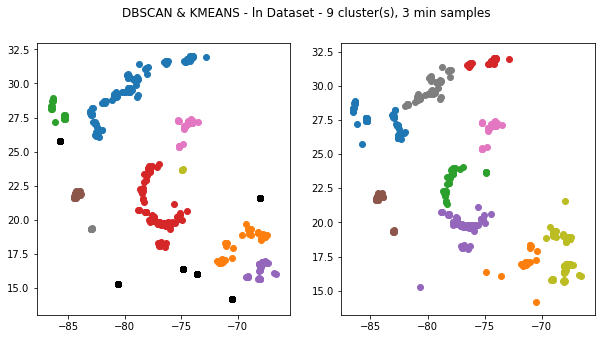

,X,Y,DBSCAN,KMEANS
122796,-79.5609,29.5326,0,7
122797,-71.0343,18.1271,1,1
122798,-85.4239,27.5546,2,0
122799,-85.3559,27.5989,2,0
122800,-76.2114,19.6181,3,4
...,...,...,...,...
123482,-78.1610,20.5861,3,4
123483,-84.5211,21.7879,5,5
123484,-84.3567,21.7220,5,5
123485,-79.8456,30.6004,0,7


[0]
Raw Comparisons: 




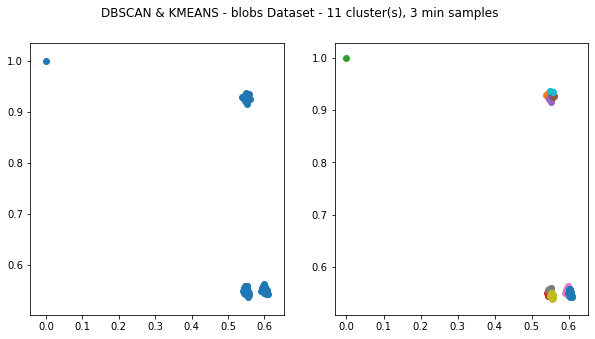

,X,Y,DBSCAN,KMEANS
0,0.000000,1.000000,0,2
1,0.605470,0.547282,0,0
2,0.590862,0.549582,0,6
3,0.548940,0.551625,0,3
4,0.603320,0.550609,0,10
...,...,...,...,...
96,0.598390,0.562372,0,6
97,0.554804,0.545750,0,8
98,0.593299,0.552969,0,6
99,0.544953,0.544810,0,3


[0]
Raw Comparisons: 




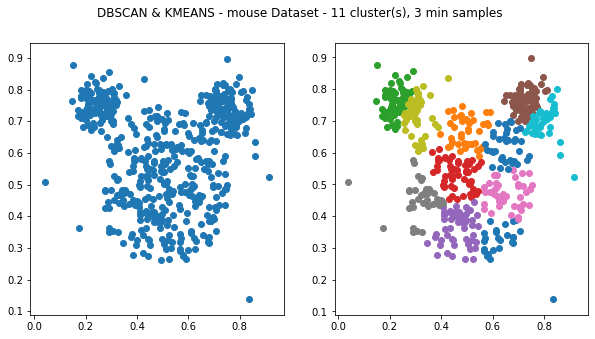

,X,Y,DBSCAN,KMEANS
0,0.456601,0.432806,0,4
1,0.611378,0.528625,0,6
2,0.450299,0.711606,0,1
3,0.639015,0.460744,0,6
4,0.628957,0.323470,0,0
...,...,...,...,...
495,0.151506,0.876586,0,2
496,0.860308,0.633833,0,9
497,0.862083,0.591805,0,9
498,0.916030,0.523391,0,9


[-1  0  1  2  3  4  5  6  7  8]
Raw Comparisons: 




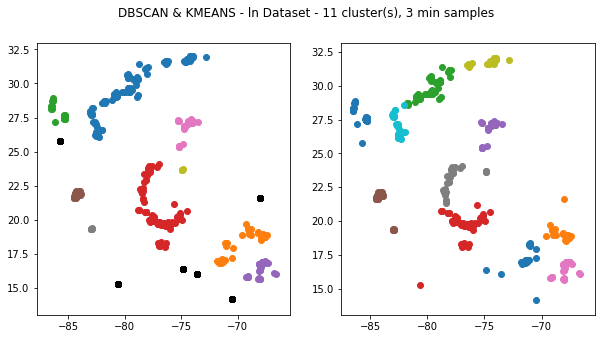

,X,Y,DBSCAN,KMEANS
122796,-79.5609,29.5326,0,2
122797,-71.0343,18.1271,1,10
122798,-85.4239,27.5546,2,0
122799,-85.3559,27.5989,2,0
122800,-76.2114,19.6181,3,3
...,...,...,...,...
123482,-78.1610,20.5861,3,3
123483,-84.5211,21.7879,5,5
123484,-84.3567,21.7220,5,5
123485,-79.8456,30.6004,0,2


Wall time: 7.92 s


In [5]:
%%time
similarities = {'mouse':[],'blobs':[],'ln':[]}
adjusted_similarities = {'mouse':[],'blobs':[],'ln':[]}
for i in range(3,12,2):
    for name, df in dfs.items():
        temp = df.copy()

        db = DBSCAN(eps=1.5, min_samples = 3).fit(temp[['X','Y']])
        db_labels = db.labels_
        temp['DBSCAN'] = db_labels
        
        db_cluster_lists_dict = {label: [temp[['X','Y']].values[i] for i in range(len(db_labels)) \
            if db_labels[i] == label] for label in set(db_labels)}
        db_cluster_center_dict = {label: [mean([x[0] for x in list_]), \
            mean([x[1] for x in list_])] for label,list_ in db_cluster_lists_dict.items() }
        db_cluster_center_list = []
        
        for key, value in db_cluster_center_dict.items():
            db_cluster_center_list.append(value)
        
        KM = KMeans(i, max_iter=max_iter, tol=tol)
        KM.fit(temp[['X','Y']])
        temp['KMEANS'] = KM.predict(temp[['X','Y']])
        kmeans_centers = KM.cluster_centers_      
        print(np.unique(temp[['DBSCAN']].values))
        print("Raw Comparisons: \n\n")
        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,5))
        fig.suptitle('DBSCAN & KMEANS - %s Dataset - %d cluster(s), %d min samples' % (name,i, 3))
        for x in range(len(np.unique(temp[['DBSCAN']].values))):
            ax1.scatter(temp[temp['DBSCAN'] == x]['X'], 
                        temp[temp['DBSCAN'] == x]['Y'], cmap='viridis')
            ax1.scatter(temp[temp['DBSCAN'] == -1]['X'], 
                        temp[temp['DBSCAN'] == -1]['Y'], c='black')
        for x in range(i):
            ax2.scatter(temp[temp['KMEANS'] == x]['X'], 
                        temp[temp['KMEANS'] == x]['Y'])
        plt.show()
        display(temp[['X','Y','DBSCAN','KMEANS']])
#         similarity = similarity_metric(temp[['FCM']].values, 
#                                        temp[['KMEANS']].values)
#         print("The predicted values are %s%% similar." % similarity)
#         similarities[name].append([i, similarity])

#         print("Centers:")
#         fcm_centers.columns = ['FCM_X', 'FCM_Y']
#         kmeans_centers = pd.DataFrame(data=kmeans_centers, 
#                                       columns=['KMEANS_X','KMEANS_Y'])
#         centers = kmeans_centers.copy().join(fcm_centers)
#         centers['distance'] = np.sqrt(abs(centers['FCM_X']-centers['KMEANS_X'])**2 + 
#                                       abs(centers['FCM_Y']-centers['KMEANS_Y'])**2)
#         display(centers)

#         print("Adjusted Comparisons: \n\n")
#         fcm_centers_ls = fcm_centers.values.tolist()
#         kmeans_centers_ls = kmeans_centers.values.tolist()
#         center_map = []
#         for fcm_cluster, fcm_c in enumerate(fcm_centers_ls):
#             min_dist = 1000
#             k_c = 0
#             for kmeans_cluster, kmeans_c in enumerate(kmeans_centers_ls):
#                 dist = np.sqrt(abs(fcm_c[0]-kmeans_c[0])**2 + 
#                                abs(fcm_c[1]-kmeans_c[1])**2)
#                 if dist < min_dist:
#                     min_dist = dist
#                     k_c = kmeans_cluster
#             center_map.append([fcm_cluster, k_c])
#         print("Center mappings: ", center_map)
#         fcm_c = temp['FCM'].values
#         kmeans_c = temp['KMEANS'].values
#         t = fcm_c.copy()
#         for k in range(len(t)):
#             for c in center_map:
#                 if c[0] == t[k]:
#                     t[k] = c[1]
#                     break
#         if 'ln' in name:
#             temp.reset_index(inplace=True)
#         temp['ADJUSTED_FCM'] = pd.Series(t)
#         display(temp)
#         fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,5))
#         fig.suptitle('FCM & KMEANS - %s Dataset - %d cluster(s)' % (name,i))
#         for x in range(i):
#             ax1.scatter(temp[temp['ADJUSTED_FCM'] == x]['X'], 
#                         temp[temp['ADJUSTED_FCM'] == x]['Y'])
#             ax2.scatter(temp[temp['KMEANS'] == x]['X'], 
#                         temp[temp['KMEANS'] == x]['Y'])
#         plt.show()
#         display(temp[['X','Y','ADJUSTED_FCM','KMEANS']])
#         display(temp[['ADJUSTED_FCM','KMEANS']].describe())
#         similarity = similarity_metric(temp[['ADJUSTED_FCM']].values, 
#                                        temp[['KMEANS']].values)
#         print("The predicted values are %s%% similar." % similarity)
#         adjusted_similarities[name].append([i, similarity])
#         print("Adjusted Centers:")
#         adjusted_fcm_centers_ls = [[]] * len(center_map)
#         for c in center_map:
#             adjusted_fcm_centers_ls[c[1]] = fcm_centers_ls[c[0]]
#         adjusted_fcm_centers = pd.DataFrame(data=adjusted_fcm_centers_ls,
#                                            columns=['ADJUSTED_FCM_X','ADJUSTED_FCM_Y'])
#         centers = kmeans_centers.copy().join(adjusted_fcm_centers)
#         centers['distance'] = np.sqrt(abs(centers['ADJUSTED_FCM_X']-centers['KMEANS_X'])**2 + 
#                                       abs(centers['ADJUSTED_FCM_Y']-centers['KMEANS_Y'])**2)
#         display(centers)
#         print("--------------------------------------------------------------")

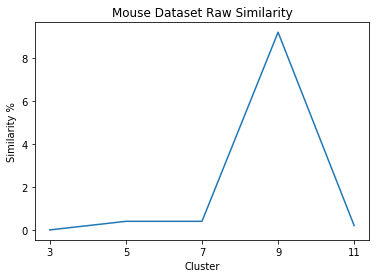

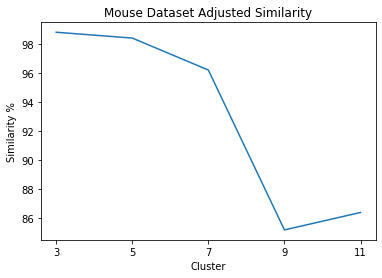

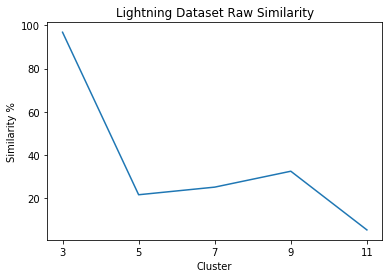

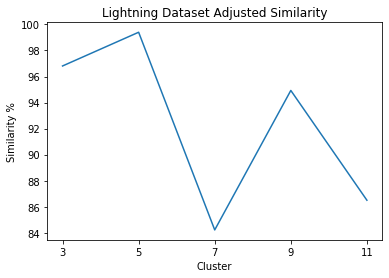

In [6]:
# THIS IS ONLY CAUSE AEON FUCKED UP AND FORGOT TO MAKE A DICT
# THAT RECORDED THIS AUTOMATICALLY
# you should use similarities and adjusted_similarities dicts for this
sim = [[3,0],[5,0.4],[7,0.4],[9,9.2],[11,0.2]]
adj_sim = [[3,98.8],[5,98.4],[7,96.2],[9,85.2],[11,86.4]]
x = [val[0] for val in sim]
y = [val[1] for val in sim]
plt.xticks(np.arange(3,12,2))
plt.title("Mouse Dataset Raw Similarity")
plt.xlabel("Cluster")
plt.ylabel("Similarity %")
plt.plot(x,y)
plt.show()
x = [val[0] for val in adj_sim]
y = [val[1] for val in adj_sim]
plt.xticks(np.arange(3,12,2))
plt.title("Mouse Dataset Adjusted Similarity")
plt.xlabel("Cluster")
plt.ylabel("Similarity %")
plt.plot(x,y)
plt.show()

sim = [[3,96.81],[5,21.5],[7,25.03],[9,32.4],[11,5.2]]
adj_sim = [[3,96.81],[5,99.4],[7,84.22],[9,94.93],[11,86.5]]
x = [val[0] for val in sim]
y = [val[1] for val in sim]
plt.xticks(np.arange(3,12,2))
plt.title("Lightning Dataset Raw Similarity")
plt.xlabel("Cluster")
plt.ylabel("Similarity %")
plt.plot(x,y)
plt.show()
x = [val[0] for val in adj_sim]
y = [val[1] for val in adj_sim]
plt.xticks(np.arange(3,12,2))
plt.title("Lightning Dataset Adjusted Similarity")
plt.xlabel("Cluster")
plt.ylabel("Similarity %")
plt.plot(x,y)
plt.show()